# Chapter 3 - Regression Exercise

#### Student ID: B082040005

#### Name: 高念慈

## Conceptual

### Q1: Suppose we have a data set with five predictors, $X_1$ = GPA, $X_2$ = IQ, $X_3$ = Level (1 for College and 0 for High School), $X_4$ = Interaction (相互作用) between GPA and IQ, and $X_5$ = Interaction between GPA and Level. The response is starting salary (起薪) after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get $\hat{\beta}_0=50,\hat{\beta}_1=20,\hat{\beta}_2=0.07,\hat{\beta}_3=36,\hat{\beta}_4=0.01,\hat{\beta}_5=-10$.

(a) Which answer is correct, and why?
> (i) For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates.

> (ii) For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates.

> (iii) For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.

> (iv) For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates provided that the GPA is high enough.

上升一單位來看，<br>
1. FALSE，大學:36-10=26；高中:0<br>
2. TRUE<br>
3. TRUE 如果X1高中大於大學x單位，<br>
大學:20+0.07+36+0.01-10=46.08<br>
高中:20+20x+0.07+0.01+0.01x=20.08+20.01x<br>
當x夠大，就會對<br>
4. FALSE，一樣就足夠贏了

(b) Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.

> 𝛽̂ 0=50,𝛽̂ 1=20,𝛽̂ 2=0.07,𝛽̂ 3=36,𝛽̂ 4=0.01,𝛽̂ 5=−10 . 

In [2]:
50 + 20*4 + 0.07*110 + 36*1 + 0.01*4*110 -10*4*1

138.1

(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.

> Ans:  FALSE，證據大小是來自檢定，跟係數本身的值無關

### Q2: I collect a set of data ($n = 100$ observations) containing a single predictor and a quantitative (定量數值) response. I then fit a linear regression model to the data, as well as a separate (分離) cubic (三次) regression, i.e. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$.

(a) Suppose that the true relationship between X and Y is linear, i.e. $Y = \beta_0 + \beta_1X + \epsilon$. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

> Ans:  三次回歸在訓練集將具有較低的殘差平方和 (RSS)
```
三次回歸模型比線性回歸模型更靈活。
因此，三次回歸模型可以更好地擬合數據並實現比線性回歸模型更低的訓練 RSS
```

(b) Answer (a) using test rather than training RSS.

> Ans:  線性回歸在測試集將具有較低的 RSS
```
由於真實關係是線性的，在這種情況下，線性回歸模型將具有低偏差。
因此，該模型將比三次回歸模型表現更好，因為三次回歸模型預計具有更高的方差。
```

(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

> Ans:  三次回歸將具有較低的 RSS

```
由於模型更靈活，因此能夠更好地擬合數據並實現更低的訓練 RSS。
```

(d) Answer (c) using test rather than training RSS.

> Ans:  沒有足夠的信息來說明
```
由於其靈活性，通常三次回歸模型比線性回歸模型具有更低的偏差和更高的方差。

但真正的關係是非線性的，但我們不知道它離線性有多遠。
意味著我們不知道線性回歸模型的偏差有多高。
如果模型只是略微非線性，線性回歸將能夠對數據進行建模並實現低偏差。
這可能足以（或不足以）擊敗三次回歸模型。
```

- **一般來說，更靈活的模型具有更少的偏差和更高的方差**
- **相比之下，更嚴格的模型具有較高的偏差和較低的方差**


- 低方差：隨著訓練資料集的變化，對目標函式估計值的變化非常小
- 高方差：隨著訓練資料集的變化，對目標函式估計值的變化非常大
- 低偏差：對目標函式提出更少的假設，KNN 和 SVM
- 高偏差：對目標函式提出更多的假設，線性迴歸和邏輯斯特迴歸

```
非引數化演算法: 較低的偏差
對目標函式做出很少或者根本不做任何假設，
但是它需要更多的資料，訓練速度非常慢，模型複雜度非常高，但是模型非常強大

引數化演算法: 較高的偏差
使得學習速度非常快，而且非常容易去理解，
不需要很多的資料，但是通常不太靈活
```
具有高偏差和低方差，過擬合問題。<br>
它總是取決於偏差-方差的權衡，並且通常取決於訓練集的大小和噪聲的大小。

## Applied

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
import matplotlib.pyplot as plt

### 模型公式&用法
[API Reference](https://www.statsmodels.org/stable/api.html)

### Q3: This question should be answered using the <span style='color:red'>Carseats</span> data set.

In [4]:
df = pd.read_csv(r"C:\Users\user\Desktop\統計探勘功課\Carseats.csv")
df

# 路徑字串開頭要寫 r & 檔案名稱.csv                         
# r :為了不讓 \ 被讀成特殊字元 EX: \n
# 指定欄位 id 為索引 (取代原本 0.1...957918的位置)
# ,index_col='id'
# college.index.name = 'Names'

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


(a) Fit a multiple regression model to predict <span style='color:red'>Sales</span> using <span style='color:red'>Price</span>, <span style='color:red'>Urban</span>, and <span style='color:red'>US</span>.

In [6]:
import statsmodels.formula.api as smf 
# statsmodels is a Python module for statistics

### 模型公式&用法
[API Reference](https://www.statsmodels.org/stable/api.html)

In [8]:
# fit regression model

mod = smf.ols(formula='Sales ~ Price + Urban + US',data=df)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           2.39e-23
Time:                        00:01:41   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative (定性) !

> Ans:  
```
城市。
該係數在統計上不顯著，表明該變量與銷售額之間沒有關係。

美國。
正相關的定性變量。
這意味著當觀察是美國時，會有更高的銷售價值。
平均而言，如果一家商店位於美國，它大約多售出 1206件。

價格。
負相關的定量變量。
這意味著價格越高，銷售額越低。
平均而言，價格每上漲 1 美元，銷售額就會下降大約 54.5 個單位。
```

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

> Ans:  

```
Sales=13.0435−0.0219×Urban+1.2006×US−0.0545×Price

⎧ 13.0435 − 0.0219×Urban + 1.2006×US − 0.0545×Price，Urban=1,US=1

⎨ 13.0435 − 0.0219×Urban − 0.0545×Price            ，Urban=1,US=0
⎪
⎪ 13.0435 + 1.2006×US − 0.0545×Price               ，Urban=0,US=1
⎪
⎪ 13.0435 − 0.0545×Price                           ，Urban=0,US=0
⎩
```

(d) For which of the predictors can you reject the null hypothesis $H_0 : \beta_j = 0$?

> Ans:  從上面的 p 值，可以拒絕截距、US 和價格；不拒絕 Urban

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

> Ans:  

In [9]:
# fit regression model

mod = smf.ols(formula='Sales ~ Price + US',data=df)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           2.66e-24
Time:                        00:33:49   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

(f) How well do the models in (a) and (e) fit the data?

> Ans:  
```
擬合程度，考慮 R^2 的值。
R^2 是決定係數，衡量模型中考慮的自變量可以解釋多少方差。

由於 R-squared 具有相同的值，0.239
因此對於兩個模型，嚴格較小的模型 (e) 是一個更好的模型，
因為對於相同的 R-squared，它使用較少的變量。

這也可以從 (e) 較小的調整後的 R 平方值中看出。

AIC & BIC 也是嚴格較小的模型 (e) 較低 --> 是一個更好的模型，減少過擬合

在任何情況下，鑑於 R^2 的值較低，這兩個模型都不能很好地擬合數據。
```

(g) Using the model from (e), obtain $95\%$ confidence intervals for
the coefficient(s).

```
               [0.025      0.975]                
Intercept      11.790      14.271
US              0.692       1.708
Price          -0.065      -0.044
```

線性回歸，係數的 95% 置信區間<br>
$$約\hatβ ± 2×SE(\hatβ)$$

In [16]:
# confidence interval for intercept

intercept_coef = 13.0308
intercept_stderr = 0.631

us_coef = 1.1996
us_stderr = 0.258

price_coef = -0.0545
price_stderr = 0.005

print('95%% intercept CI: [ %2.4f; %2.4f] ' % (intercept_coef-2*intercept_stderr, intercept_coef+2*intercept_stderr))
print('95%% US CI: [ %2.4f; %2.4f] ' % (us_coef-2*us_stderr, us_coef+2*us_stderr))
print('95%% Price CI: [ %2.4f; %2.4f] ' % (price_coef-2*price_stderr, price_coef+2*price_stderr))

95% intercept CI: [ 11.7688; 14.2928] 
95% US CI: [ 0.6836; 1.7156] 
95% Price CI: [ -0.0645; -0.0445] 


[練習 3.10](https://botlnec.github.io/islp/sols/chapter3/exercise10/)

**（H）**

調查異常值或高槓桿點的存在，我們分析了標準化殘差與槓桿的關係圖<br>
程式碼見上面連結最後

### Q4: This problem focuses on the *collinearity (共線性)* problem.

(a) Perform (執行) the following commands in <span style='color:red'>Python</span>:

In [17]:
np.random.seed(1)
x1 = np.random.normal(size=100)
x2 = 0.5*x1 + np.random.normal(size=100)/10
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size=100)

The last line corresponds to creating a linear model in which <span style='color:red'>y</span> is
a function of <span style='color:red'>x1</span> and <span style='color:red'>x2</span>. Write out the form of the linear model.
What are the regression coefficients?

> Ans:  $$Y=β0+β1X1+β2X2+ϵ=2+2X1+0.3X2+ϵ$$

(b) What is the correlation between <span style='color:red'>x1</span> and <span style='color:red'>x2</span>? Create a scatterplot
displaying the relationship between the variables.

> Ans:

In [18]:
import statsmodels.api as sm # To use statsmodel
import statsmodels.formula.api as smf # To use statsmodel with R-style formulas
from statsmodels.stats import outliers_influence
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [19]:
np.corrcoef(x1,x2)  # 0.97947512

array([[1.        , 0.97947512],
       [0.97947512, 1.        ]])

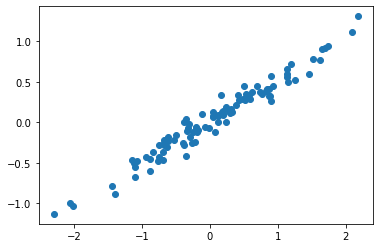

In [20]:
plt.scatter(x1,x2)

(c) Using this data, fit a least squares regression to predict <span style='color:red'>y</span> using <span style='color:red'>x1</span> and <span style='color:red'>x2</span>. Describe the results obtained. What are $\hat{\beta}_0$,  $\hat{\beta}_1$, and $\hat{\beta}_2$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $H_0 : \beta_1 = 0$? How about the null hypothesis $H_0 : \beta_2 = 0$?

In [21]:
# Define data
X = pd.DataFrame({'x1':x1, 'x2':x2})
X = sm.add_constant(X)  
# No constant is added by the model unless we're using formulas, so we have to add it

# Create model
model = sm.OLS(y, X)

# Fit regression model
results = model.fit()

# Print results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     177.8
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           3.58e-33
Time:                        01:30:53   Log-Likelihood:                -140.24
No. Observations:                 100   AIC:                             286.5
Df Residuals:                      97   BIC:                             294.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9802      0.101     19.539      0.000       1.779       2.181
x1             0.8462      0.560      1.512      0.134      -0.265       1.957
x2             2.4837      1.076      2.308      0.023       0.348       4.619
==============================================================================
Omnibus:                        0.256   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.076
Skew:                          -0.063   Prob(JB):                        0.963
Kurtosis:                       3.048   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Ans:  

$\hatβ0=1.9802$<br>
$\hatβ1=0.8462$<br>
$\hatβ2=2.4837$<br>

$β0=2$<br> 
$β1=2$<br>
$β2=0.3$

除了截距項其他都差蠻多的

看 p-value<br>
𝐻0:𝛽1=0 大，不拒絕<br>
𝐻0:𝛽2=0 小，拒絕

In [22]:
# Way 2

# Define data
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})  # We don't need to add constant because we will use formulas

# Create model
mod = smf.ols(formula='y ~ x1 + x2', data=df)  # R-style command

# Fit model
res = mod.fit()

# Print results
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     177.8
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           3.58e-33
Time:                        02:28:06   Log-Likelihood:                -140.24
No. Observations:                 100   AIC:                             286.5
Df Residuals:                      97   BIC:                             294.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9802      0.101     19.539      0.0

In [23]:
# Way 3

# Create model
lr = LinearRegression()

# Fit model
mod = lr.fit(X,y)

# Get coefficients
mod.coef_

array([0.        , 0.84624601, 2.4837135 ])

(d) Now fit a least squares regression to predict <span style='color:red'>y</span> using only <span style='color:red'>x1</span>. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

> Ans:  y = 2.0167 + 2.1118*x1；P 值為 0 ，拒絕 H0

```
0.8462 --> 2.1118 
接近真實 β1=2 
```

In [24]:
X = pd.DataFrame({'x1':x1})
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     335.5
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           2.07e-33
Time:                        02:32:46   Log-Likelihood:                -142.92
No. Observations:                 100   AIC:                             289.8
Df Residuals:                      98   BIC:                             295.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0167      0.102     19.715      0.0

(e) Now fit a least squares regression to predict <span style='color:red'>y</span> using only <span style='color:red'>x2</span>. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_2 = 0$?

> Ans:  y = 1.9589 + 4.0770*x2；P 值為 0 ，拒絕 H0
```
2.4837 --> 4.0770
β2=0.3
```

In [25]:
X = pd.DataFrame({'x2':x2})
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     348.8
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           4.71e-34
Time:                        02:39:37   Log-Likelihood:                -141.41
No. Observations:                 100   AIC:                             286.8
Df Residuals:                      98   BIC:                             292.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9589      0.101     19.392      0.0

(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

> Ans:  
```
不矛盾。因為共線性。(高相關值和散點圖、Y 的生成所暗示的那樣)

當兩個變量在同一個線性模型中時，其中一個變量會失去解釋力，
因為它所解釋的方差已經被另一個變量解釋了。

因此，如果單獨考慮，這兩個變量都會拒絕原假設，
但如果一起考慮，其中一個變量是可忽略的。

# y = 2 + 2 * x1 + 0.3 * x2 
# x2 = 0.5 * x1
# x1

按照X1寫X2,x1係數得到 2.15 該值完全在 (d) 中計算的置信區間內，[1.883  2.341]
同樣，對於X2係數的期望值為 4.3，該值落在 (e) 中計算的置信區間內 [3.644  4.510] 
```

(g) Now suppose we obtain one additional observation, which was
unfortunately (不幸) mismeasured (測量錯誤).

In [26]:
x1 = np.append(x1,0.1)
x2 = np.append(x2,0.8)
y = np.append(y,6)

Re-fit the linear models from (c) to (e) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

### Model (c)

In [27]:
# Define data
X = pd.DataFrame({'x1':x1, 'x2':x2})
X = sm.add_constant(X)  
# No constant is added by the model unless we're using formulas, so we have to add it

# Create model
model = sm.OLS(y, X)

# Fit regression model
results = model.fit()

# Print results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     181.6
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           1.10e-33
Time:                        03:07:18   Log-Likelihood:                -142.34
No. Observations:                 101   AIC:                             290.7
Df Residuals:                      98   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9772      0.102     19.382      0.000       1.775       2.180
x1             0.3296      0.449      0.735      0.464      -0.561       1.220
x2             3.4988      0.851      4.111      0.000       1.810       5.188
==============================================================================
Omnibus:                        0.782   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.478
Skew:                          -0.159   Prob(JB):                        0.788
Kurtosis:                       3.108   Cond. No.                         9.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Ans:  

$\hatβ0=1.9802 --> 1.9772$<br>
$\hatβ1=0.8462 --> 0.3296$<br>
$\hatβ2=2.4837 --> 3.4988$<br>

$β0=2$<br> 
$β1=2$<br>
$β2=0.3$

除了截距項其他都差蠻多的

看 p-value<br>
𝐻0:𝛽1=0 大，不拒絕<br>
𝐻0:𝛽2=0 小，拒絕

R-squared:	0.786 --> 0.787 上升

### Model (d)

In [28]:
X = pd.DataFrame({'x1':x1})
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     298.4
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           1.23e-31
Time:                        03:07:19   Log-Likelihood:                -150.37
No. Observations:                 101   AIC:                             304.7
Df Residuals:                      99   BIC:                             310.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0540      0.108     19.012      0.0

> Ans:  y = 2.0167 + 2.1137*x1；P 值為 0 ，拒絕 H0

```
結果差不多
0.8462 --> 2.1118 --> 2.1137
β1=2 

R-squared: 0.774 --> 0.751 下降
```

### Model (e)

In [29]:
X = pd.DataFrame({'x2':x2})
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     364.3
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           5.98e-35
Time:                        03:07:20   Log-Likelihood:                -142.62
No. Observations:                 101   AIC:                             289.2
Df Residuals:                      99   BIC:                             294.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9652      0.100     19.561      0.0

> Ans:  y = 1.9589 + 4.1038*x2；P 值為 0 ，拒絕 H0
```
結果差不多
2.4837 --> 4.0770 --> 4.1038
β2=0.3

R-squared: 0.781 --> 0.786 上升
```

**In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers**

In [30]:
# Add to dataframe (easier for outlier analysis plots)

sample = {'x1': .1, 'x2': .8, 'y': 6}  # Create point
df = df.append(sample, ignore_index=True)  # Append sample to existing dataframe
df

,x1,x2,y
0,1.624345,0.767460,5.078050
1,-0.611756,-0.183427,1.545465
2,-0.528172,-0.223737,0.314230
3,-1.072969,-0.477126,1.665803
4,0.865408,0.323213,2.495827
...,...,...,...
96,-0.343854,-0.111695,1.696086
97,0.043597,0.063827,2.891112
98,-0.620001,-0.228905,-0.264099
99,0.698032,0.453460,4.118013


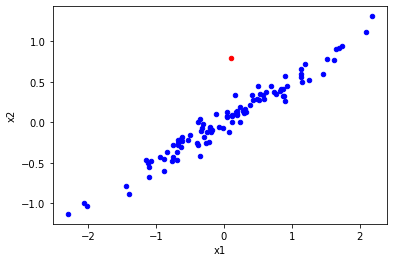

In [32]:
# Bivariate analysis (x1,x2)

sample = df.iloc[-1:]  # To get the last observation
other = df.iloc[:-1]  # To get all the observations but the last

ax = other.plot(kind='scatter',x='x1',y='x2', color='blue');  # Plot all observations but the last in blue
sample.plot(ax=ax, kind='scatter',x='x1',y='x2', color='red');  # Plot last observation added in red

預測值的組合看起來還好，沒特別超出雙邊範圍，感覺像一個沒那麼嚴重的槓桿點。

**注意：**

**我們沒有將預測變量與響應進行比較，也沒有評估是否與模型預測的值相差甚遠。**

**因此，根據這個情節討論它是否是異常值是沒有意義的。**

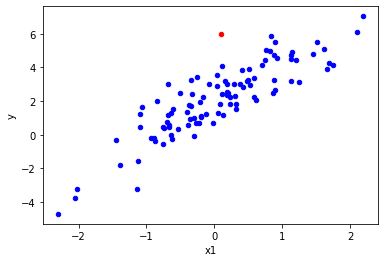

In [36]:
# Bivariate analysis (x1,y)

sample = df.iloc[-1:]  # To get the last observation
other = df.iloc[:-1]  # To get all the observations but the last

ax = other.plot(kind='scatter',x='x1',y='y', color='blue');  # Plot all observations but the last in blue
sample.plot(ax=ax, kind='scatter',x='x1',y='y', color='red');  # Plot last observation added in red

紅點勉強隨趨勢，看起來其實不像一個異常值。<br>
紅點沒有異常X1價值，所以它看起來不像是一個高槓桿點。

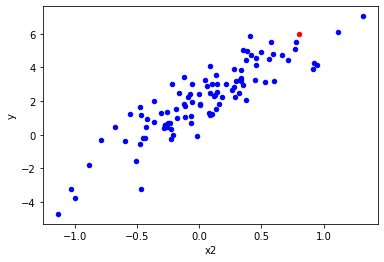

In [37]:
# Bivariate analysis (x2,y)

sample = df.iloc[-1:]  # To get the last observation
other = df.iloc[:-1]  # To get all the observations but the last

ax = other.plot(kind='scatter',x='x2',y='y', color='blue');  # Plot all observations but the last in blue
sample.plot(ax=ax, kind='scatter',x='x2',y='y', color='red');  # Plot last observation added in red

紅點跟隨趨勢，看起來不像異常值。<br>
紅點落在X2範圍，看起來不像一個高槓桿點。

```
總之：
觀察值增加影響模型，主要是在X1和X2模型
這意味著即使是 100 次中的 1 次觀察，這種觀察減少了現有的共線性現象。

根據散點圖，添加的觀察值似乎不是異常值，勉強算槓桿點。

結論可以從
面對剩余觀察時添加的觀察的視覺觀察得出、與幾種情況下的其他觀察結果相比。

添加的觀察結果顯示了
預測變量值、預測變量值和顯著不同行為的不明顯，可能利用檢定會更確定。
```

[練習 3.14](https://botlnec.github.io/islp/sols/chapter3/exercise14/)
  
```
離群值 :
一個點與模型擬合預測的預期範圍相差甚遠。是否代表母體的問題。

可以根據所考慮的變量（特徵）的數量從單變量、雙變量或多變量的角度識別異常值。
我們應該使用盡可能多的視角，在它們之間尋找一致的模式來識別異常值。

明顯超出其他觀察範圍的案例將被視為散點圖中的孤立點。
通常，雙變量方法的一個缺點是隨著變量數量的增加，可能會出現大量散點圖。

高槓桿點 :
異常值是響應的觀察值是不尋常的，給定預測X 
相比之下，具有高槓桿的觀測值具有不尋常的X 

槓桿是衡量一個觀察值的自變量值與其他觀察值的距離的度量
對於單個預測變量，極值 x 只是一個特別高或特別低的值

但是在具有許多預測變量的多元線性回歸中，
可能有一個觀察值恰好在每個單獨的預測變量值的範圍內，但在整個預測變量集方面是不尋常的。
對於多個預測變量，
一個或多個預測變量的極端 x 值可能特別高或特別低，或者可能是預測變量值的“不尋常”組合
（例如，對於正相關的兩個預測變量，預測變量值的不尋常組合可能是高一個預測變量的值與另一個預測變量的低值配對）。
```